# Geometrical Methods in Machine Learning
## Homework 1

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA, FastICA

### Task 1: PCA, interpretation (2 points)

Consider Ozone Level dataset, https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection.

Apply PCA analysis to data to find PCA estimate of data dimensionality given by the number of variables explaining 80% and 95% of the variance.

Draw and interpret biplots of the first two principal components and top 5 features with the highest influence (largest absolute eigenvalue coefficient) to each first two principal components. Can you interpret the each of first two principal components in terms of original variables? Are there any meaningful groupings in the original variables?

Comment whether PCA is applicable to categorical variables, as well as your preprocessing strategy for them.

In [202]:
import pandas as pd

X, y = fetch_openml("ozone_level", return_X_y=True)
X: pd.DataFrame = X

# print(X)
print(len(X))

X = X.apply(lambda x: pd.to_numeric(x, errors="coerce"))
X.dropna(inplace=True)

# print(X)
print(len(X))

2536
1848


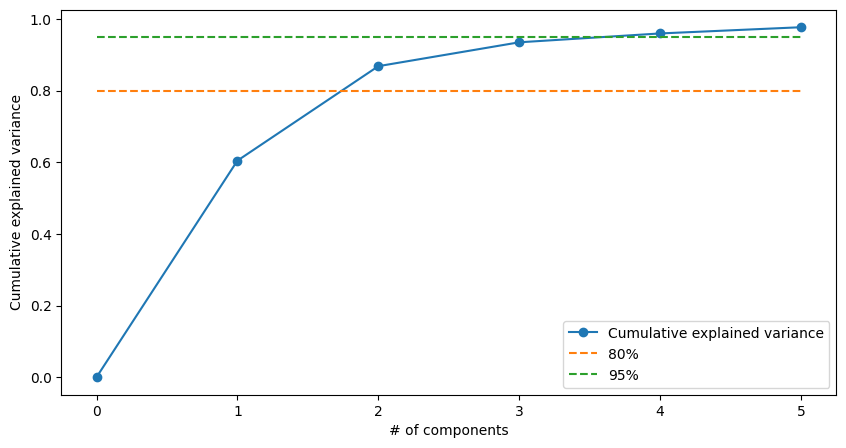

In [203]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=5)
pca.fit(X)

cum_var = np.cumsum(np.insert(pca.explained_variance_ratio_, 0, 0))
x_ticks = np.arange(0, len(cum_var))

plt.figure(figsize=(10, 5))
plt.plot(
    x_ticks,
    cum_var,
    marker="o",
    linestyle="-",
    label="Cumulative explained variance",
)
plt.plot([0.8] * len(x_ticks), linestyle="--", label="80%")
plt.plot([0.95] * len(x_ticks), linestyle="--", label="95%")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(x_ticks)
plt.legend()
plt.show()

In [204]:
target_pca_components = pca.components_[:2, :]
# print(target_pca_components)

top5_features = np.argpartition(target_pca_components, -5, axis=1)[:, -5:]

print("Top features for 1 PCA component", X.columns[top5_features[0]])
print("Top features for 2 PCA component", X.columns[top5_features[1]])

Top features for 1 PCA component Index(['T8', 'KI', 'HT85', 'HT70', 'HT50'], dtype='object')
Top features for 2 PCA component Index(['U50', 'HT70', 'SLP', 'SLP_', 'HT85'], dtype='object')


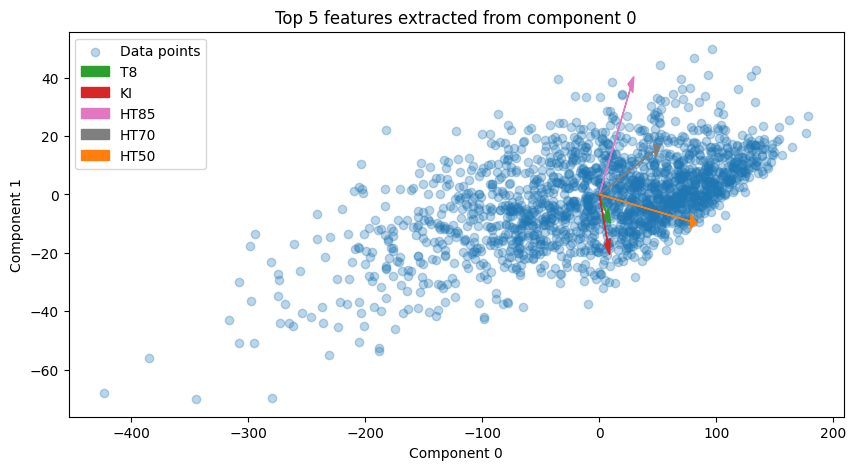

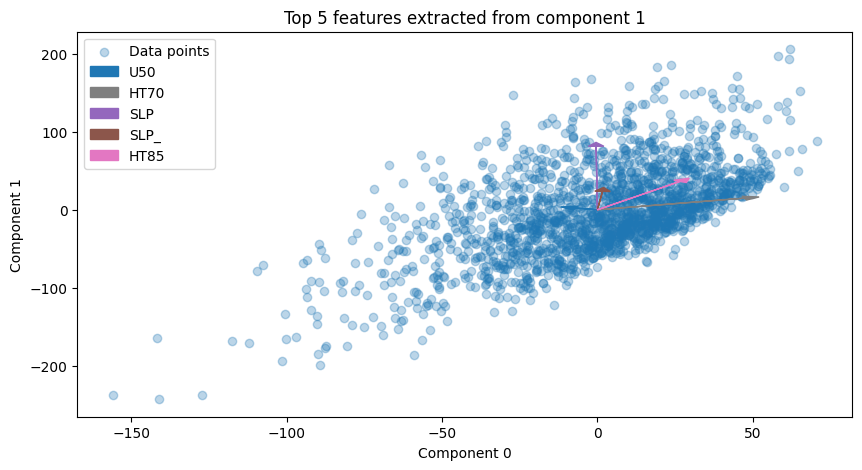

In [205]:
featured_pca_components0 = np.take(target_pca_components, top5_features[0], 1)
featured_pca_components1 = np.take(target_pca_components, top5_features[1], 1)

first_top5_features_projection = (X.iloc[:, top5_features[0]] - pca.mean_[top5_features[0]]) @ np.take(
    target_pca_components, top5_features[0], 1
).T
second_top5_features_projection = (X.iloc[:, top5_features[1]] - pca.mean_[top5_features[1]]) @ np.take(
    target_pca_components, top5_features[1], 1
).T

feature_colors = {}
for i, feature in enumerate(set(list(top5_features[0]) + list(top5_features[1]))):
    feature_colors[feature] = plt.cm.tab10(i)

feature_arrow_scale = 100

plt.figure(figsize=(10, 5))
plt.scatter(
    first_top5_features_projection[0], first_top5_features_projection[1] - pca.mean_[1], alpha=0.3, label="Data points"
)
for feature in top5_features[0]:
    feature_vec = np.array([target_pca_components[0, feature], target_pca_components[1, feature]])
    feature_vec = feature_vec * feature_arrow_scale
    plt.arrow(
        0,
        0,
        feature_vec[0],
        feature_vec[1],
        head_width=5,
        head_length=5,
        label=X.columns[feature],
        color=feature_colors[feature],
    )
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.title("Top 5 features extracted from component 0")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(
    second_top5_features_projection[0],
    second_top5_features_projection[1] - pca.mean_[1],
    alpha=0.3,
    label="Data points",
)
for feature in top5_features[1]:
    feature_vec = np.array([target_pca_components[0, feature], target_pca_components[1, feature]])
    feature_vec = feature_vec * feature_arrow_scale
    plt.arrow(
        0,
        0,
        feature_vec[0],
        feature_vec[1],
        head_width=5,
        head_length=5,
        label=X.columns[feature],
        color=feature_colors[feature],
    )
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.title("Top 5 features extracted from component 1")
plt.legend()
plt.show()

**Answer**

It takes 2 PCA components to achieve 80% explained variance and 4 PCA components to achieve 95% explained variance.

Yes, we can clearly see which features contribute the most to which PCA component. Component 0:  HT70, HT85, U50, HT50. Component 1: HT85, KI, T8, SLP, SLP_.

Based on the feature direction, it makes sense to group: SLP and SLP_, KI and T8.

### Task 2: PCA, classification (2 points)

Consider the classification problem of predicting the target variable `y` of eight vs one hour peak data subset. Apply a classifier of your choice on raw data and PCA-reduced data for specified explained variance level. Conclude whether applying PCA was able to improve the classification results.

Perform a feature selection, selecting top 5 performing features, with any technique you know, compare them with top 5 features influencing the first two principal components.

In [206]:
# your code here

### Task 3: ICA, optimization (2 points)

Implement ICA solution with the (projected) gradient descent optimization scheme, using one of the following loss functions (see Lecture 3 slides):

- kurtosis, or
- negative entropy, or
- mutual information.

To which classes of the approaches to the solution of ICA problem those loss functions belong to?

Apply ICA using obtained optimization procedure to the mixture of $X_1 \sim Laplace(0,1)$ and $X_2 \sim U(0,1)$ used in Seminar 2.

In [207]:
# your code here

### Task 4: ICA, signal separation and reconstruction (2 points)

Consider the EEG dataset ``hw1/data/EEG.npy`` consisting of brain electrical activity of dimension $d=10001$ measured over time via $m=64$ electrodes. In EEG every single electrode captures activity not only in the direct vicitity, but in the neighboring areas as well, so we can of think of every electode signal as a linear mixture of local and neighboring activity, thus suiting the ICA model:

$$\mathbf{X} = \mathbf{A}\mathbf{S}$$

where $\mathbf{S} \in \mathbb{R}^{n \times d}$ - $n$ source signals of dimension $d$, $\mathbf{X} \in \mathbb{R}^{m \times d}$ - $m$ observations of dimension $d$, $\mathbf{A}$ - $m \times n$ mixing matrix, where $m \geq n, \mathrm{Rank}(\mathbf{A}) = n$.

Along with the normal brain activity, the signal may contain various artifacts, like eye blinks, seen as rapid and high amplitude noise corrupting the signal.

The task is to separate the signal from noise, given by ICA components having blinks. Find $n=40$ sources using `FastICA` from sklearn. Handpick the sources contaning blinks and remove them while reconstucting the the signals back from sources, not having the blinks. You can additionally preprocess the data with `PCA` reducing the number of signals to $m_{PCA}=48$.

**Note:** the key for the reconstruction is the mixing matrix $\mathbf{A}$, it can be found via ``ica.mixing_``.

In [208]:
X = np.load("./data/EEG.npy")

FileNotFoundError: [Errno 2] No such file or directory: './data/EEG.npy'

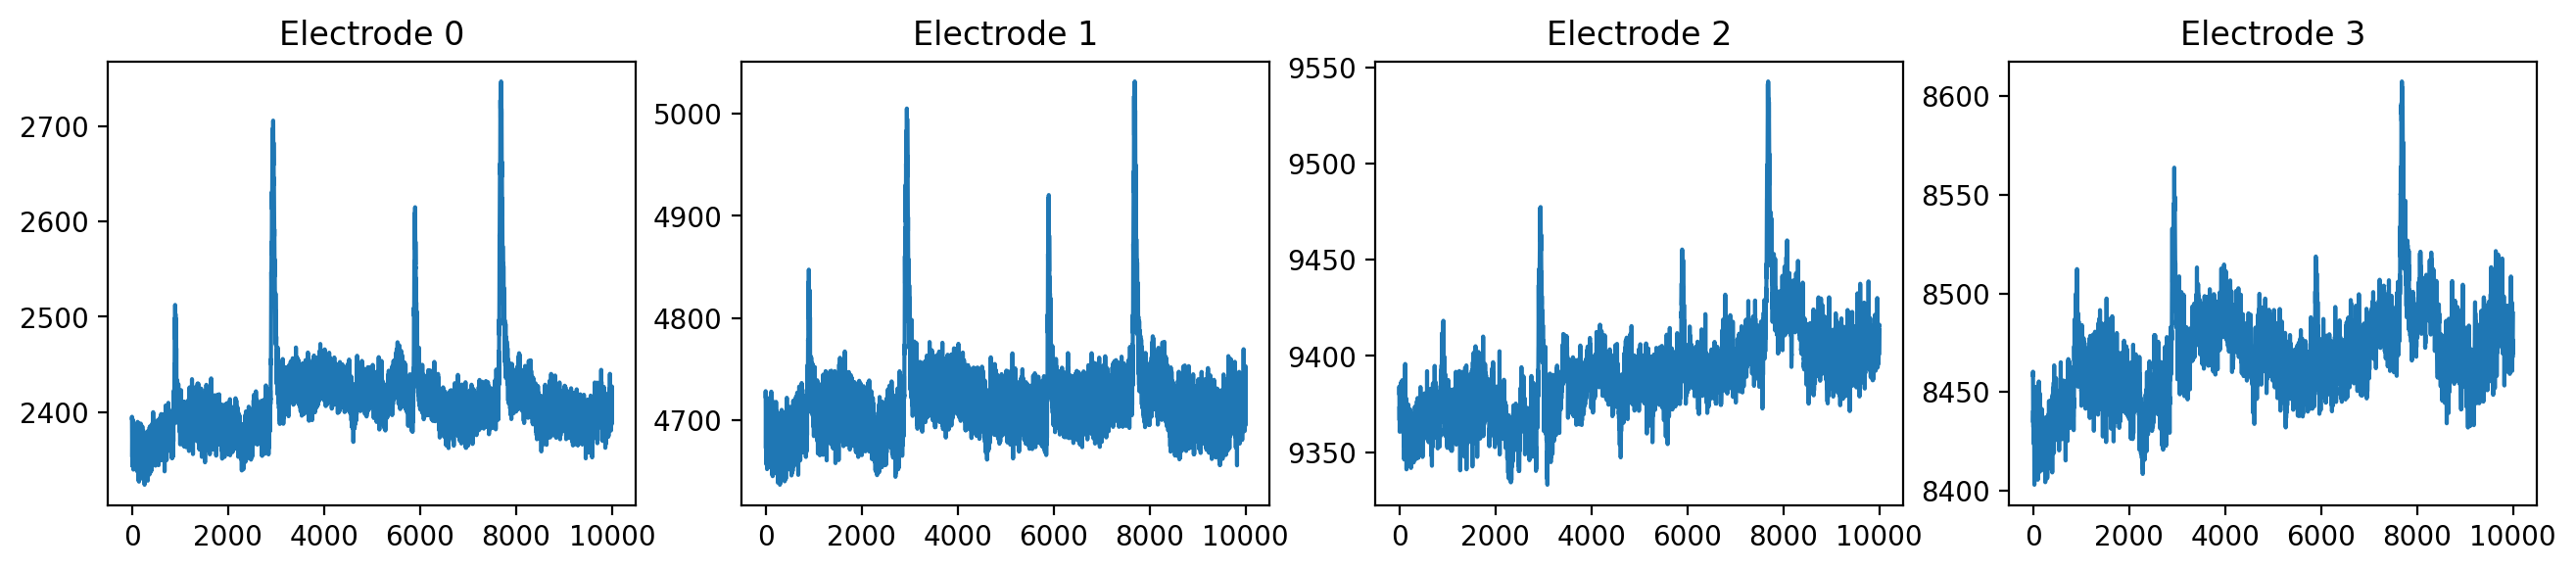

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
for j in range(4):
    ax[j].set_title("Electrode {}".format(j))
    ax[j].plot(X[:, j])
plt.show()

In [ ]:
# your code here

#### Grading:

- 8/10 points are awarded for completing all the tasks and giving proper answers to questions.
- 2/10 points are awarded for the quality of reporting, be sure to give explanations and comments to your solutions.
- +1 extra point may be awarded for the extra work performed, be creative.